In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

In [ ]:
# 板块指数编制
# 1.黑色系指数
# 2.化工指数
# 3.油脂油料指数
# 4.石油链指数
# 5.农产品指数
# 6.焦煤焦炭
# 7.黄金白银

In [ ]:
# 指数编制的意义
# 1.不畏浮云遮望眼，从更高的维度对市场行情审时度势
# 2.春江水暖鸭先知，捕捉市场各品种间的联动lead-lag效应

In [3]:
black_series = [
    'RB8888',
    'HC8888',
    'I8888',
    'J8888',
    'JM8888',
    'SS8888'
]

In [11]:
# 目标文件夹路径
folder_path = Path('Commodity_Data')

# 黑色系品种
black_series = [
    'RB8888',
    'HC8888',
    'I8888',
    'J8888',
    'JM8888',
    'SS8888'
]

# 初始化保存结果的列表
black_data_list = []

# 遍历文件夹中所有CSV文件
for csv_file in folder_path.glob('*.csv'):
    # 提取文件名（不带后缀）
    file_stem = csv_file.stem
    if file_stem in black_series:
        # 读取csv文件
        df = pd.read_csv(csv_file,index_col=0) 
        # 只保留close和volume列（假设列名为这两个）
        if 'close' in df.columns and 'volume' in df.columns:
            df_selected = df[['close', 'money', 'symbol']].copy()
            black_data_list.append(df_selected)
        else:
            print(f"文件 {csv_file.name} 缺少close或volume列")

In [13]:
# 提取每个品种的 close，按 symbol 分类
symbol_close_dict = {}
symbol_money_dict = {}
for df in black_data_list:
    symbol = df['symbol'].iloc[0]
    symbol_close_dict[symbol] = df['close'].copy()
    symbol_money_dict[symbol] = df['money'].copy()

In [ ]:
# 计算每个品种每个时点的成交额占比
# TODO 这里也可以转换成持仓金额
# 将字典转为 DataFrame（列是symbol，行为时间）
money_df = pd.DataFrame(symbol_money_dict)
# 计算每行的总成交额
total_money = money_df.sum(axis=1)
# 计算每个symbol的成交额占比
money_ratio_df = money_df.div(total_money, axis=0)

In [20]:
# 计算以基期价格校准后的收盘价
symbol_close_ratio_dict = {}

for symbol, close_series in symbol_close_dict.items():
    first_price = close_series.iloc[0]
    ratio_series = close_series / first_price
    symbol_close_ratio_dict[symbol] = ratio_series

In [22]:
close_df = pd.DataFrame(symbol_close_ratio_dict)

In [23]:
close_df

,HC8888,I8888,J8888,JM8888,RB8888,SS8888
datetime,,,,,,
2025-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2025-01-03,0.986328,0.977098,0.964482,0.979037,0.990389,0.996363
2025-01-06,0.980718,0.961581,0.956660,0.985206,0.985115,1.000631
2025-01-07,0.976539,0.959117,0.944226,0.961469,0.980466,1.003010
2025-01-08,0.970199,0.956191,0.926706,0.940369,0.971841,1.014407
...,...,...,...,...,...,...
2025-07-21,0.992991,1.022591,0.883814,0.872724,0.977738,1.006751
2025-07-22,1.017078,1.041187,0.936475,0.921410,1.003372,1.008530
2025-07-23,1.005369,1.027626,0.940575,0.989685,0.993155,1.006792


In [24]:
money_ratio_df

,HC8888,I8888,J8888,JM8888,RB8888,SS8888
datetime,,,,,,
2025-01-02,0.132713,0.210574,0.026540,0.103357,0.418823,0.107992
2025-01-03,0.137291,0.241125,0.029392,0.100360,0.388755,0.103079
2025-01-06,0.128285,0.247579,0.020703,0.099386,0.401896,0.102150
2025-01-07,0.122343,0.229907,0.023849,0.120460,0.390459,0.112982
2025-01-08,0.116694,0.213253,0.022835,0.123232,0.369551,0.154435
...,...,...,...,...,...,...
2025-07-21,0.142723,0.167454,0.021246,0.335378,0.271098,0.062100
2025-07-22,0.124726,0.169519,0.028086,0.354393,0.281794,0.041482
2025-07-23,0.091649,0.116833,0.032436,0.499867,0.217584,0.041630


In [25]:
index_price = (close_df * money_ratio_df).sum(axis=1)


<Axes: xlabel='datetime'>

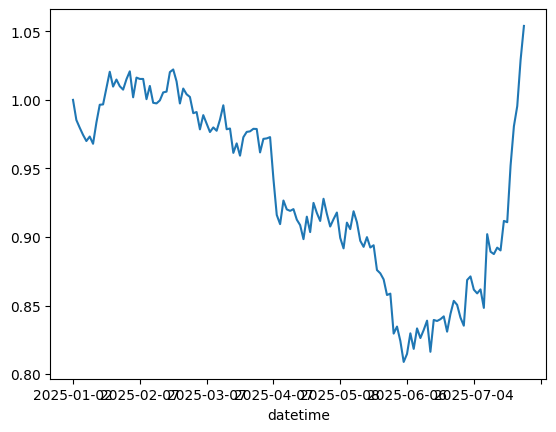

In [27]:
index_price.plot()